# Score card model

This notebook looks into using various Python-based machine learning and data science libaries 
in an attempt to build a machine learning model capable of predicting whether or not someone has chance to become bankrupt based on their personal information



We're going to take a following approach :
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Defination

In a statment, 
> Given personal information in the bank of a person , can we predict they can pay for the loan or not ?

## 2. Data

The orginal data comes from the link below
`http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv`
## 3. Evaluation 

> We want to achive an accuracy up to 95 % at predicting whether or not a person has chance of become bankrupt or not, we'll pursue the project.

## 4. Features 

**Data Dictionary**


|    |    |
|----|----|
| **BAD** | (=1) Customers can't pay for the loan or have loan for too long;
|    | (=0) Customers can pay for the loan. |
| **LOAN** | lend (a sum of money or item of property). |
| **MORTDUE** | Amount due for an existing mortgage. |
| **VALUE** | Value of current collateral. |
| **REASON** | The reason that person have to  loan the money. |
|    | DebtCon = Debt Consolidation; |
|    | HomeImp = Home Improvement; |
| **JOB** | Job. |
| **YOJ** | Years work for the company. |
| **DEROG** | Number of negative reports (credit reports). |
| **DELINQ** | Number of overdue credits. |
| **CLAGE** | Age of the longest loan/credit line in months. |
| **NINQ** | Number of recent credit report queries. |
| **CLNO** | Number of current loans/credit lines. |
| **DEBTINC** | The ratio of Debt and Wages. |

In [152]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# Models evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from xgboost import XGBClassifier

In [5]:
url = 'http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv'

loan_data = pd.read_csv(url)


In [6]:
loan_data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
loan_data.VALUE

0        39025.0
1        68400.0
2        16700.0
3            NaN
4       112000.0
          ...   
5955     90185.0
5956     92937.0
5957     92924.0
5958     91861.0
5959     88934.0
Name: VALUE, Length: 5960, dtype: float64

In [9]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [10]:
loan_data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [11]:
loan_data['REASON'].value_counts(dropna = False)

DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64

In [12]:
loan_data['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

In [13]:
loan_data['JOB'].value_counts(dropna = False)

Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64

## Data cleaning
### Fill missing data

In [14]:
loan_data['MORTDUE'].isna().value_counts()

False    5442
True      518
Name: MORTDUE, dtype: int64

In [15]:
loan_data['MORTDUE'].mean()

73760.81719955898

In [16]:
# Fill the mean to the missing data
loan_data['MORTDUE'].fillna(loan_data['MORTDUE'].mean())

0       25860.0000
1       70053.0000
2       13500.0000
3       73760.8172
4       97800.0000
           ...    
5955    57264.0000
5956    54576.0000
5957    54045.0000
5958    50370.0000
5959    48811.0000
Name: MORTDUE, Length: 5960, dtype: float64

In [17]:
loan_data['MORTDUE']

0       25860.0
1       70053.0
2       13500.0
3           NaN
4       97800.0
         ...   
5955    57264.0
5956    54576.0
5957    54045.0
5958    50370.0
5959    48811.0
Name: MORTDUE, Length: 5960, dtype: float64

In [18]:
loan_data['MORTDUE'] = loan_data['MORTDUE'].fillna(loan_data['MORTDUE'].mean())

In [19]:
loan_data['MORTDUE'].isna().value_counts()

False    5960
Name: MORTDUE, dtype: int64

In [20]:
loan_data['REASON'].isna().value_counts(dropna=False)

False    5708
True      252
Name: REASON, dtype: int64

In [21]:
# For the classification category we can fill the missing value with "missing"
loan_data['REASON'].isna().value_counts()

False    5708
True      252
Name: REASON, dtype: int64

In [22]:
loan_data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [23]:
loan_data['JOB'] = loan_data['JOB'].fillna("Missing")

In [24]:
loan_data['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Missing     279
Self        193
Sales       109
Name: JOB, dtype: int64

In [25]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [26]:
for col in loan_data.columns:
    if loan_data[col].dtype == 'object':
        loan_data[col] = loan_data[col].fillna('Missing')
    else:
        loan_data[col] = loan_data[col].fillna(loan_data[col].mean())

In [27]:
loan_data.sample(20)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5618,0,38100,204071.0,270794.0,DebtCon,ProfExe,3.000000,0.00000,0.000000,230.398576,0.000000,32.000000,31.369739
5065,0,27000,144901.0,178093.0,DebtCon,ProfExe,7.000000,0.00000,0.000000,331.113972,0.000000,34.000000,40.566552
5619,0,38100,33446.0,73289.0,DebtCon,ProfExe,5.000000,0.00000,0.000000,180.847815,1.000000,18.000000,23.820415
3856,0,20200,61303.0,97780.0,HomeImp,ProfExe,17.000000,0.00000,1.000000,632.103186,1.000000,24.000000,20.737039
398,0,6500,80739.0,97630.0,DebtCon,ProfExe,1.000000,0.25457,0.449442,179.766275,1.186055,21.296096,30.531265
2132,0,13300,44952.0,56394.0,DebtCon,Other,8.922268,0.00000,0.000000,74.435993,0.000000,14.000000,41.060321
3642,0,19100,129111.0,197592.0,HomeImp,ProfExe,12.000000,0.00000,0.000000,207.155174,0.000000,21.000000,36.141778
3191,0,17100,92853.0,130864.0,DebtCon,Mgr,6.000000,0.25457,0.449442,244.728811,3.000000,41.000000,37.492646
5785,0,47000,42437.0,109553.0,HomeImp,Self,10.000000,0.00000,0.000000,206.714076,2.000000,35.000000,40.142521
4091,1,21400,104657.0,147364.0,DebtCon,Other,7.000000,2.00000,0.000000,149.254480,2.000000,20.000000,46.305072


In [28]:
loan_data['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Missing     252
Name: REASON, dtype: int64

In [29]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


## EDA

1. We will plot the distribution for the integers (continuous variable)
2. We will plot the bar graph for the categories (discrete variable)

<AxesSubplot:xlabel='MORTDUE', ylabel='Count'>

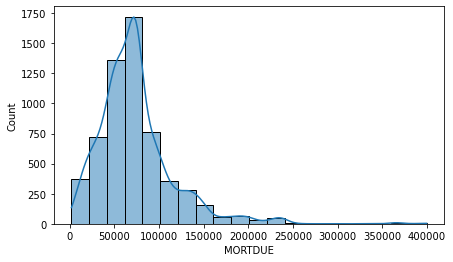

In [30]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.histplot(data=loan_data,
    x='MORTDUE',
    ax=ax, 
    bins=20, 
    kde=True) # histogram plot

In [31]:
loan_data['LOAN']

0        1100
1        1300
2        1500
3        1500
4        1700
        ...  
5955    88900
5956    89000
5957    89200
5958    89800
5959    89900
Name: LOAN, Length: 5960, dtype: int64

<AxesSubplot:xlabel='LOAN', ylabel='Count'>

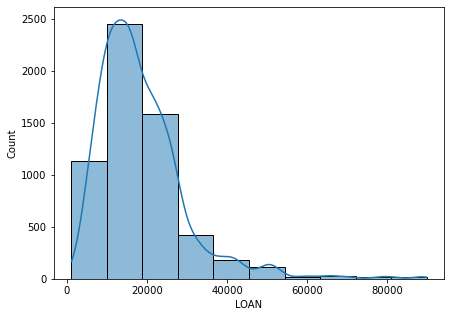

In [32]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(ax=ax, x=loan_data['LOAN'], bins=10, kde=True)

In [33]:
loan_data['REASON']

0       HomeImp
1       HomeImp
2       HomeImp
3       Missing
4       HomeImp
         ...   
5955    DebtCon
5956    DebtCon
5957    DebtCon
5958    DebtCon
5959    DebtCon
Name: REASON, Length: 5960, dtype: object

<AxesSubplot:xlabel='JOB', ylabel='count'>

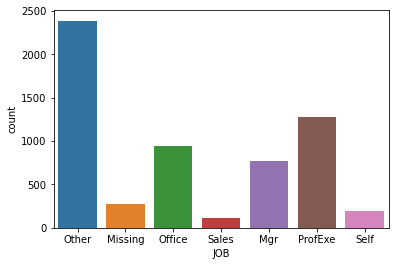

In [34]:
fig, ax = plt.subplots()
sns.countplot(ax=ax, x=loan_data['JOB'])

Plot all the distribution to see the features

In [35]:
def plot_distribution(data, col_name, bins=10, ax=None):
    plot_data = data[col_name] # --> loan_data['MORTDUE']
    ax = sns.histplot(ax=ax, x=plot_data, bins=bins, kde=True)
    title = 'Distribution of {}'.format(col_name)
    ax.set_title(title)
# histplot  --> axes
# displot --> figure

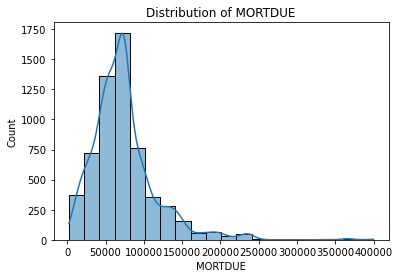

In [36]:
plot_distribution(data = loan_data, bins=20, col_name = 'MORTDUE')

In [37]:
def plot_valuecount(data, col_name, ax=None):
    plot_data = data[col_name]
    title = 'Value count of {}'.format(col_name)
    ax = sns.countplot(ax=ax, x=plot_data)
    ax.set_title(title)
 #   return ax

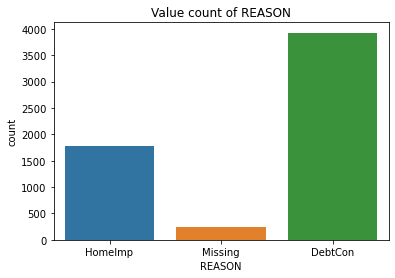

In [38]:
plot_valuecount(data = loan_data, col_name = 'REASON')

In [39]:
loan_data.columns[1:]

Index(['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [40]:
for i, col in enumerate(loan_data.columns[1:]):
    print(i, col)

0 LOAN
1 MORTDUE
2 VALUE
3 REASON
4 JOB
5 YOJ
6 DEROG
7 DELINQ
8 CLAGE
9 NINQ
10 CLNO
11 DEBTINC


Text(0.5, 0.98, 'Visualization of features')

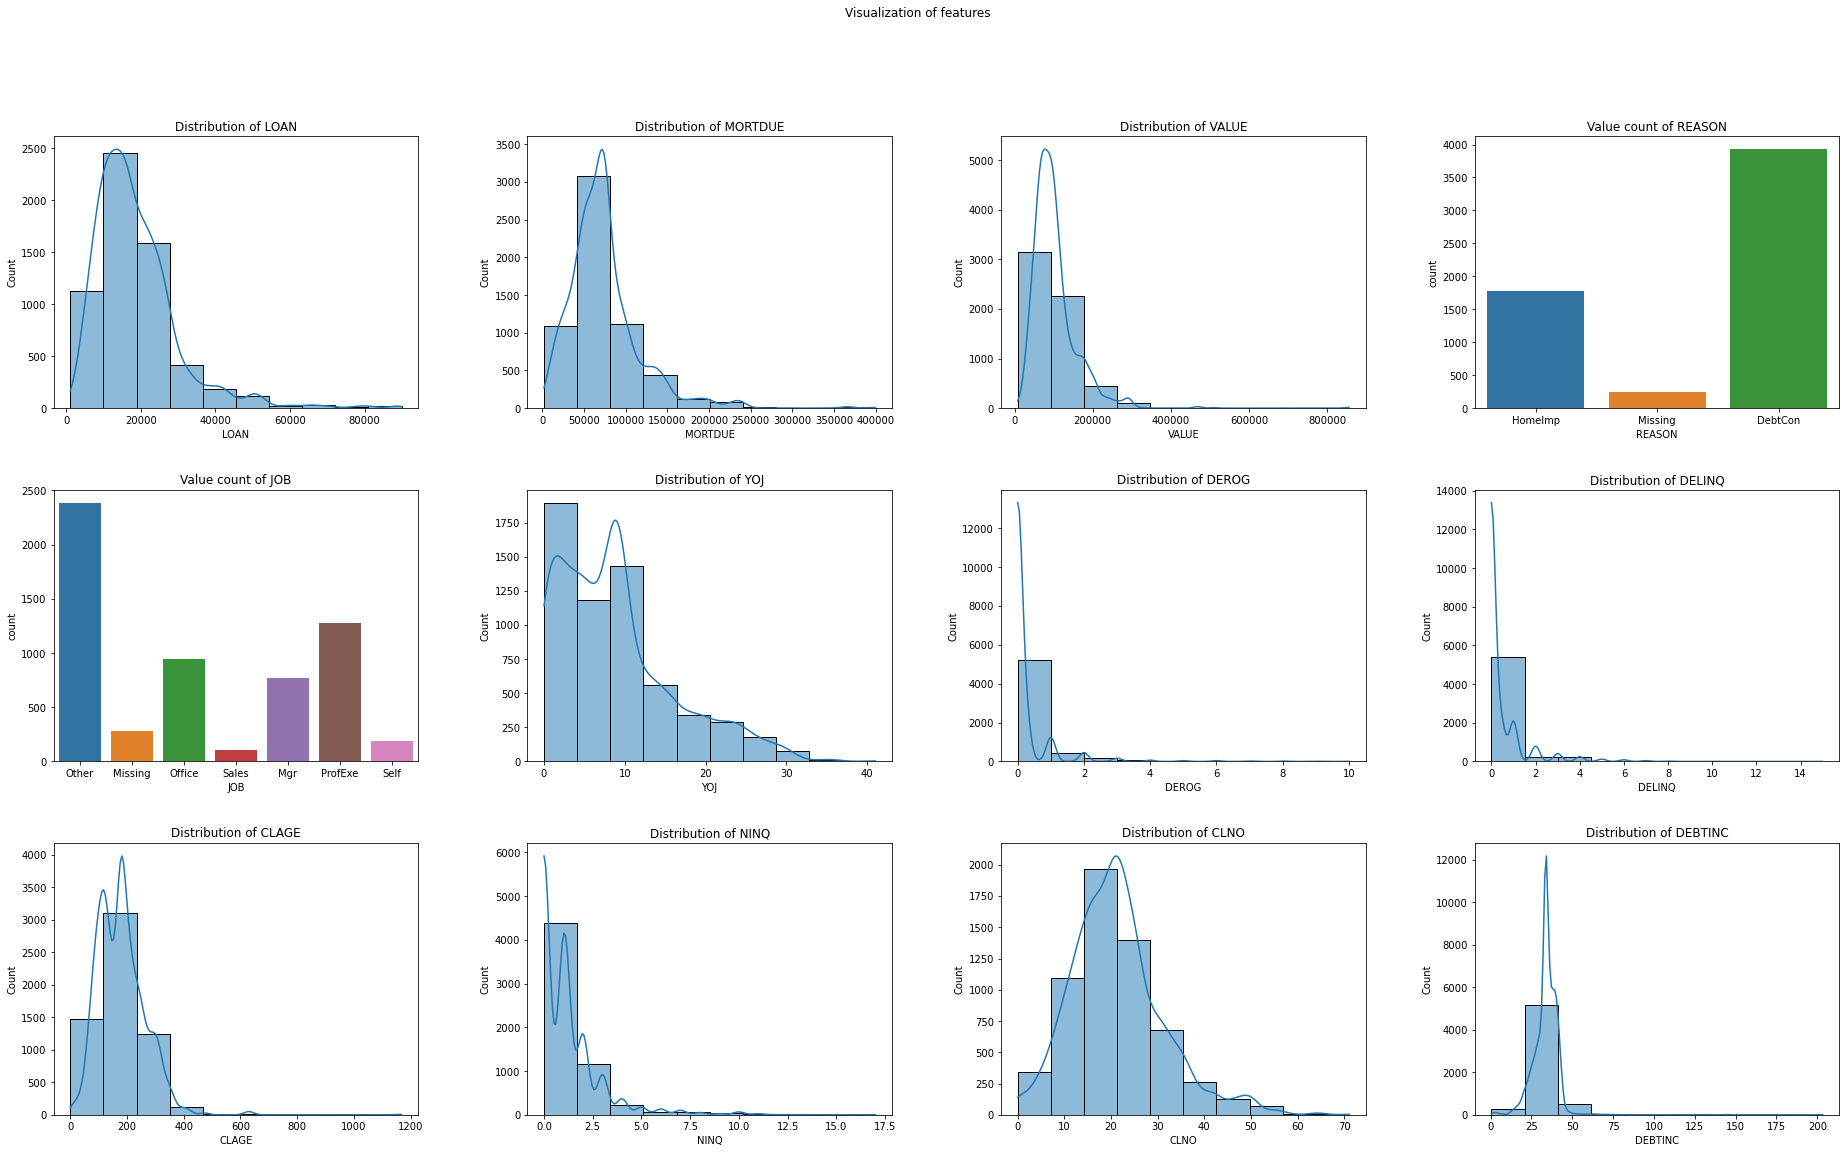

In [41]:
fig = plt.figure(figsize=(32, 18))

for i, col in enumerate(loan_data.columns[1:]):
    ax = fig.add_subplot(3, 4, i+1)
    if loan_data[col].dtypes == 'object':
        plot_valuecount(loan_data, col, ax=ax)
    else:
        plot_distribution(loan_data, col, bins=10, ax=ax)

fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Visualization of features')

<AxesSubplot:xlabel='YOJ', ylabel='BAD'>

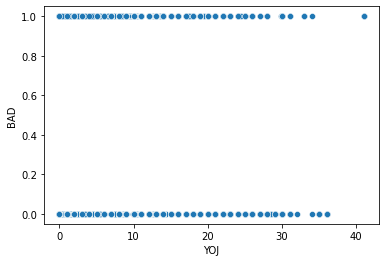

In [42]:
fig, ax = plt.subplots()
sns.scatterplot(data=loan_data, x='YOJ', y='BAD', ax=ax)

In [43]:
loan_data[['DEBTINC', 'BAD']]

,DEBTINC,BAD
0,33.779915,1
1,33.779915,1
2,33.779915,1
3,33.779915,1
4,33.779915,0
...,...,...
5955,36.112347,0
5956,35.859971,0
5957,35.556590,0
5958,34.340882,0


<AxesSubplot:xlabel='MORTDUE', ylabel='BAD'>

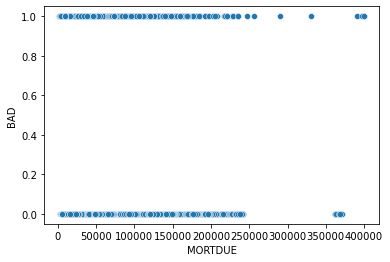

In [44]:
fig, ax = plt.subplots()
sns.scatterplot(data=loan_data, x='MORTDUE', y='BAD', ax=ax)

<AxesSubplot:xlabel='MORTDUE', ylabel='Count'>

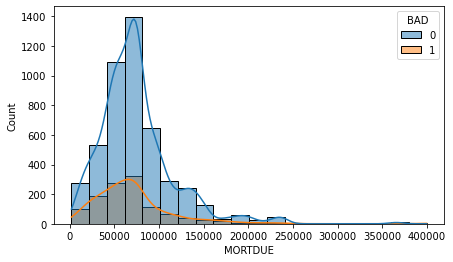

In [45]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.histplot(data=loan_data,
    x='MORTDUE',
    hue='BAD',
    ax=ax, 
    bins=20, 
    kde=True)

In [46]:
def plot_distribution_with_bad(data, col_name, col_bad, bins=10, ax=None):
    ax = sns.histplot(ax=ax, data=data, x=col_name, hue=col_bad, bins=bins, kde=True)
    title = 'Distribution of {}'.format(col_name)
    ax.set_title(title)

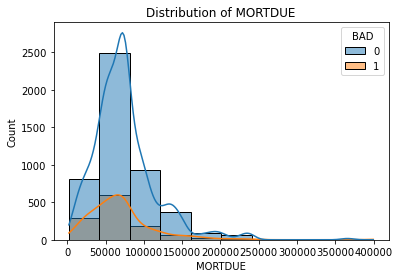

In [47]:
plot_distribution_with_bad(data=loan_data, col_name='MORTDUE', col_bad='BAD')

In [48]:
def plot_valuecount_with_bad(data, col_name, col_bad, ax=None):
    title = 'Value count of {}'.format(col_name)
    ax = sns.countplot(ax=ax, data=data, x=col_name, hue=col_bad)
    ax.set_title(title)

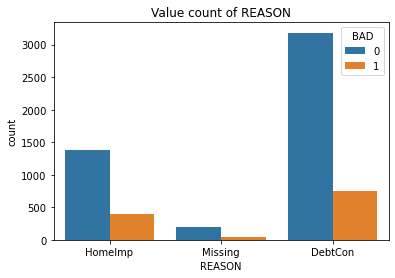

In [49]:
plot_valuecount_with_bad(data=loan_data, col_name='REASON', col_bad='BAD')

Text(0.5, 0.98, 'Visualization of features')

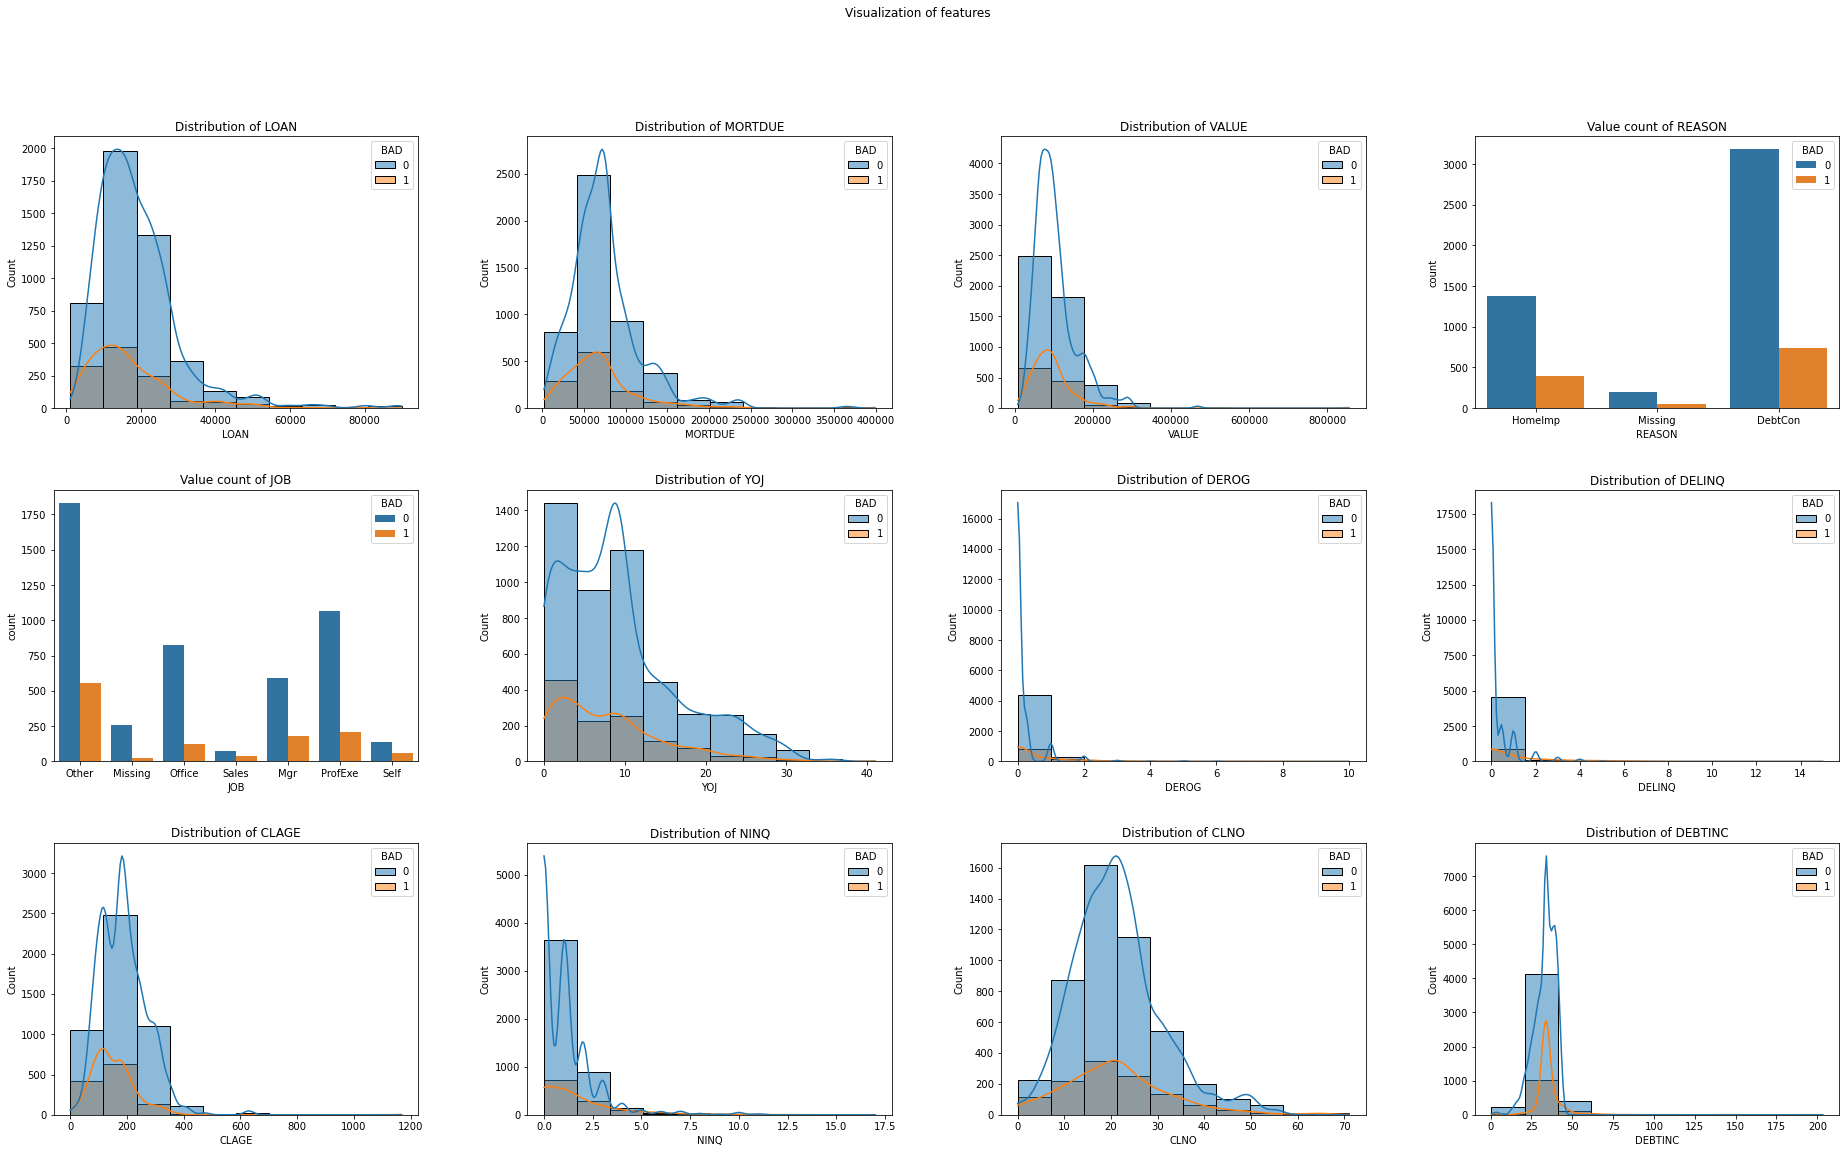

In [50]:
fig = plt.figure(figsize=(32, 18))
col_bad='BAD'

for i, col in enumerate(loan_data.columns[1:]):
    ax = fig.add_subplot(3, 4, i+1)
    if loan_data[col].dtypes == 'object':
        plot_valuecount_with_bad(loan_data, col, col_bad, ax=ax)
    else:
        plot_distribution_with_bad(loan_data, col, col_bad, bins=10, ax=ax)

fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Visualization of features')

<AxesSubplot:xlabel='REASON', ylabel='YOJ'>

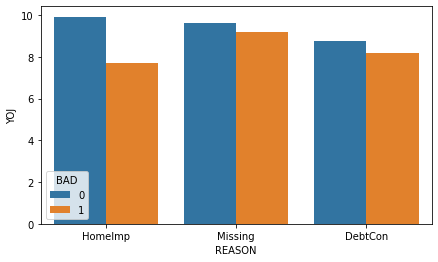

In [51]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(data=loan_data, x='REASON', y='YOJ', hue='BAD', ci=False)

<AxesSubplot:xlabel='JOB', ylabel='YOJ'>

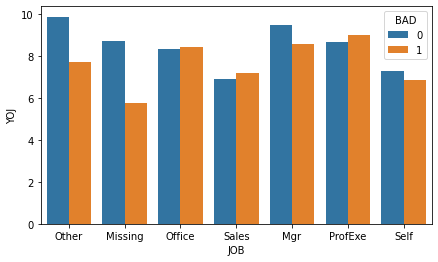

In [52]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(data=loan_data, x='JOB', y='YOJ', hue='BAD', ci=False)

<AxesSubplot:xlabel='REASON', ylabel='YOJ'>

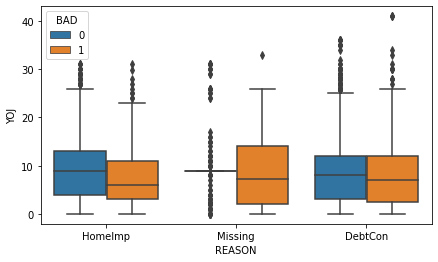

In [53]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.boxplot(data=loan_data, x='REASON', y='YOJ', hue='BAD')

In [54]:
correl = loan_data.corr()

In [55]:
correl

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.046034,-0.028852,-0.058314,0.264068,0.341472,-0.165113,0.168851,-0.004067,0.124324
LOAN,-0.075099,1.000000,0.216100,0.331862,0.100664,-0.001256,-0.033879,0.086874,0.043160,0.071804,0.074823
MORTDUE,-0.046034,0.216100,1.000000,0.779787,-0.082856,-0.044358,-0.000974,0.130757,0.029480,0.305288,0.128326
VALUE,-0.028852,0.331862,0.779787,1.000000,0.007382,-0.044744,-0.013521,0.167938,-0.004216,0.264037,0.115796
YOJ,-0.058314,0.100664,-0.082856,0.007382,1.000000,-0.059263,0.037314,0.190937,-0.067898,0.024023,-0.047642
DEROG,0.264068,-0.001256,-0.044358,-0.044744,-0.059263,1.000000,0.184901,-0.077468,0.155494,0.057948,0.011194
DELINQ,0.341472,-0.033879,-0.000974,-0.013521,0.037314,0.184901,1.000000,0.021810,0.064407,0.159105,0.029939
CLAGE,-0.165113,0.086874,0.130757,0.167938,0.190937,-0.077468,0.021810,1.000000,-0.110091,0.231595,-0.038052
NINQ,0.168851,0.043160,0.029480,-0.004216,-0.067898,0.155494,0.064407,-0.110091,1.000000,0.085148,0.109212
CLNO,-0.004067,0.071804,0.305288,0.264037,0.024023,0.057948,0.159105,0.231595,0.085148,1.000000,0.157885


<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

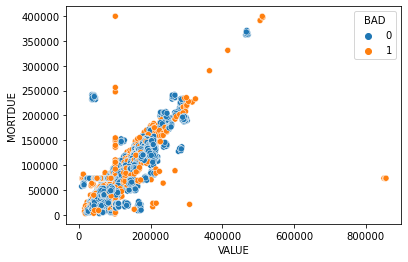

In [56]:
fig, ax = plt.subplots()
sns.scatterplot(data=loan_data, x='VALUE', y='MORTDUE', hue='BAD', ax=ax)

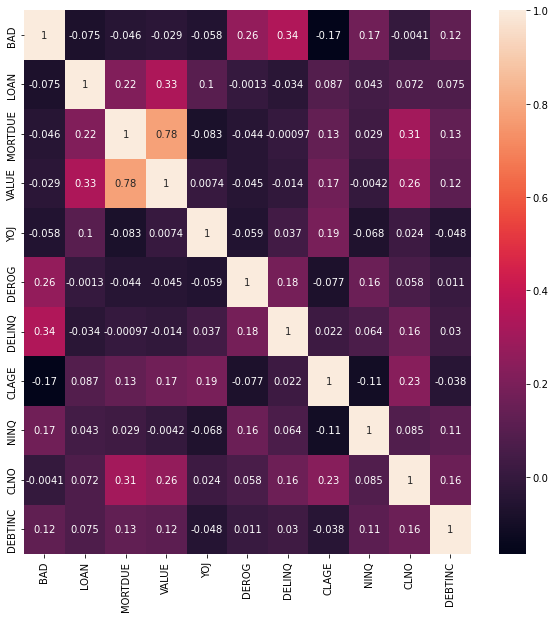

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correl, annot=True);

<AxesSubplot:>

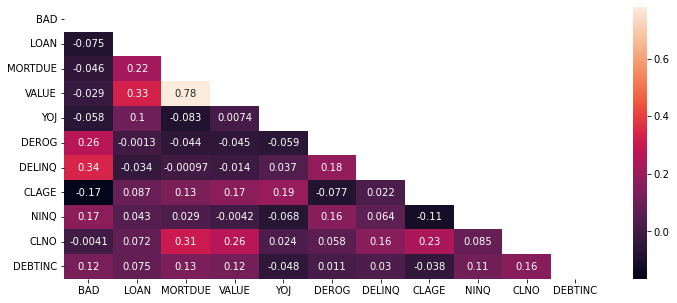

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))
mask = np.zeros_like(correl)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correl, annot=True, mask=mask)

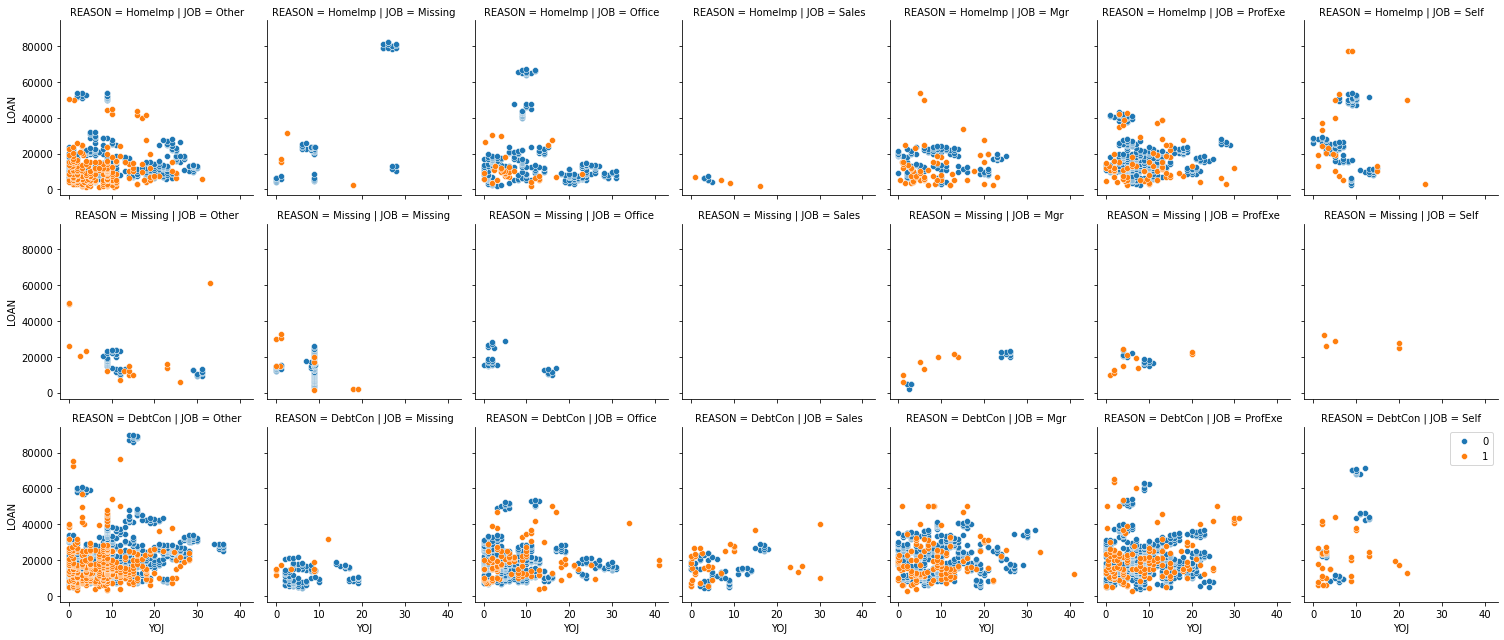

In [59]:
facet_grid = sns.FacetGrid(data=loan_data, row='REASON', col='JOB', hue='BAD')
facet_grid.map(sns.scatterplot, 'YOJ', 'LOAN')
plt.legend()

## Feature Engineering

In [60]:
loan_data = pd.read_csv(url)

In [61]:
loan_data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [62]:
loan_data.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

### Cleaning the number

In [63]:
ser = loan_data.groupby(['REASON'])['YOJ'].apply(lambda x: x.fillna(x.mean()))# Fill with the mean
ser

0       10.5
1        7.0
2        4.0
4        3.0
5        9.0
        ... 
5955    16.0
5956    16.0
5957    15.0
5958    14.0
5959    15.0
Name: YOJ, Length: 5708, dtype: float64

In [64]:
loan_data['YOJ'] = ser

In [65]:
loan_data['YOJ'].isnull().sum()

252

In [66]:
for col in loan_data.columns:
    if loan_data[col].dtype != 'object':
        loan_data[col] = loan_data[col].fillna(loan_data[col].mean())

In [67]:
loan_data['YOJ'].isnull().sum()

0

### Cleaning the categories 

In [68]:
for col in loan_data.columns:
    if loan_data[col].dtype == 'object':
        loan_data[col] = loan_data[col].fillna('Missing')

### Make more features

In [69]:
loan_data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,Missing,Missing,8.895137,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [70]:
loan_data['LOAN_BINS'] = pd.cut(loan_data['LOAN'], bins=10)

In [71]:
loan_data['LOAN_BINS']

0         (1011.2, 9980.0]
1         (1011.2, 9980.0]
2         (1011.2, 9980.0]
3         (1011.2, 9980.0]
4         (1011.2, 9980.0]
               ...        
5955    (81020.0, 89900.0]
5956    (81020.0, 89900.0]
5957    (81020.0, 89900.0]
5958    (81020.0, 89900.0]
5959    (81020.0, 89900.0]
Name: LOAN_BINS, Length: 5960, dtype: category
Categories (10, interval[float64, right]): [(1011.2, 9980.0] < (9980.0, 18860.0] < (18860.0, 27740.0] < (27740.0, 36620.0] ... (54380.0, 63260.0] < (63260.0, 72140.0] < (72140.0, 81020.0] < (81020.0, 89900.0]]

In [72]:
loan_data['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Missing     279
Self        193
Sales       109
Name: JOB, dtype: int64

In [73]:
(loan_data['REASON']=='HomeImp')&(loan_data['JOB']=='Office')

0       False
1       False
2       False
3       False
4        True
        ...  
5955    False
5956    False
5957    False
5958    False
5959    False
Length: 5960, dtype: bool

In [74]:
loan_data['HomeImp_Office'] = (loan_data['REASON']=='HomeImp')&(loan_data['JOB']=='Office')

In [75]:
loan_data['Missing_Self'] = (loan_data['REASON']=='Missing')&(loan_data['JOB']=='Self')

In [76]:
loan_data['HomeImp_Office']

0       False
1       False
2       False
3       False
4        True
        ...  
5955    False
5956    False
5957    False
5958    False
5959    False
Name: HomeImp_Office, Length: 5960, dtype: bool

In [77]:
loan_data.dtypes

BAD                  int64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
LOAN_BINS         category
HomeImp_Office        bool
Missing_Self          bool
dtype: object

In [78]:
loan_data['VALUE_P_J'] = loan_data['VALUE']/loan_data['YOJ']

In [79]:
loan_data['VALUE_P_J'] 

0        3716.666667
1        9771.428571
2        4175.000000
3       11441.762737
4       37333.333333
            ...     
5955     5636.562500
5956     5808.562500
5957     6194.933333
5958     6561.500000
5959     5928.933333
Name: VALUE_P_J, Length: 5960, dtype: float64

In [80]:
loan_data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN_BINS,HomeImp_Office,Missing_Self,VALUE_P_J
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,"(1011.2, 9980.0]",False,False,3716.666667
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,"(1011.2, 9980.0]",False,False,9771.428571
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,"(1011.2, 9980.0]",False,False,4175.000000
3,1,1500,73760.8172,101776.048741,Missing,Missing,8.895137,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,"(1011.2, 9980.0]",False,False,11441.762737
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,"(1011.2, 9980.0]",True,False,37333.333333


In [81]:
loan_data.dtypes

BAD                  int64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
LOAN_BINS         category
HomeImp_Office        bool
Missing_Self          bool
VALUE_P_J          float64
dtype: object

In [82]:
loan_data['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Missing     279
Self        193
Sales       109
Name: JOB, dtype: int64

In [83]:
 from sklearn.preprocessing import LabelEncoder

In [84]:
col_labels_encoder = ['REASON']

In [85]:
le = LabelEncoder()

In [86]:
df = loan_data.copy()

In [87]:
df['REASON'] = le.fit_transform(df['REASON'])

In [88]:
df[col_labels_encoder].value_counts()

REASON
0         3928
1         1780
2          252
dtype: int64

In [89]:
col_one_hot_encoder = ['JOB', 'LOAN_BINS', 'HomeImp_Office']

In [90]:
df = pd.get_dummies(df, columns=col_one_hot_encoder)

In [91]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,...,"LOAN_BINS_(18860.0, 27740.0]","LOAN_BINS_(27740.0, 36620.0]","LOAN_BINS_(36620.0, 45500.0]","LOAN_BINS_(45500.0, 54380.0]","LOAN_BINS_(54380.0, 63260.0]","LOAN_BINS_(63260.0, 72140.0]","LOAN_BINS_(72140.0, 81020.0]","LOAN_BINS_(81020.0, 89900.0]",HomeImp_Office_False,HomeImp_Office_True
0,1,1100,25860.0000,39025.000000,1,10.500000,0.00000,0.000000,94.366667,1.000000,...,0,0,0,0,0,0,0,0,1,0
1,1,1300,70053.0000,68400.000000,1,7.000000,0.00000,2.000000,121.833333,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,1,1500,13500.0000,16700.000000,1,4.000000,0.00000,0.000000,149.466667,1.000000,...,0,0,0,0,0,0,0,0,1,0
3,1,1500,73760.8172,101776.048741,2,8.895137,0.25457,0.449442,179.766275,1.186055,...,0,0,0,0,0,0,0,0,1,0
4,0,1700,97800.0000,112000.000000,1,3.000000,0.00000,0.000000,93.333333,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [92]:
df.dtypes

BAD                               int64
LOAN                              int64
MORTDUE                         float64
VALUE                           float64
REASON                            int64
YOJ                             float64
DEROG                           float64
DELINQ                          float64
CLAGE                           float64
NINQ                            float64
CLNO                            float64
DEBTINC                         float64
Missing_Self                       bool
VALUE_P_J                       float64
JOB_Mgr                           uint8
JOB_Missing                       uint8
JOB_Office                        uint8
JOB_Other                         uint8
JOB_ProfExe                       uint8
JOB_Sales                         uint8
JOB_Self                          uint8
LOAN_BINS_(1011.2, 9980.0]        uint8
LOAN_BINS_(9980.0, 18860.0]       uint8
LOAN_BINS_(18860.0, 27740.0]      uint8
LOAN_BINS_(27740.0, 36620.0]      uint8


In [93]:
df['YOJ'].min()

0.0

In [94]:
df['VALUE'].min()

8000.0

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
col_min_max_scaler = [i for i in loan_data.columns if (i not in col_one_hot_encoder)&(i not in col_labels_encoder)&(i != 'BAD')]

In [98]:
col_min_max_scaler = ['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [99]:
df[col_min_max_scaler] = scaler.fit_transform(df[col_min_max_scaler])

In [150]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'Missing_Self', 'JOB_Mgr',
       'JOB_Missing', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales',
       'JOB_Self', 'LOAN_BINS_(1011.2, 9980.0]', 'LOAN_BINS_(9980.0, 18860.0]',
       'LOAN_BINS_(18860.0, 27740.0]', 'LOAN_BINS_(27740.0, 36620.0]',
       'LOAN_BINS_(36620.0, 45500.0]', 'LOAN_BINS_(45500.0, 54380.0]',
       'LOAN_BINS_(54380.0, 63260.0]', 'LOAN_BINS_(63260.0, 72140.0]',
       'LOAN_BINS_(72140.0, 81020.0]', 'LOAN_BINS_(81020.0, 89900.0]',
       'HomeImp_Office_False', 'HomeImp_Office_True'],
      dtype='object')

In [173]:
# Remove some speacial character in features name so that we can use XGBoost
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

In [175]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'Missing_Self', 'JOB_Mgr',
       'JOB_Missing', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales',
       'JOB_Self', 'LOAN_BINS_(1011.2, 9980.0_', 'LOAN_BINS_(9980.0, 18860.0_',
       'LOAN_BINS_(18860.0, 27740.0_', 'LOAN_BINS_(27740.0, 36620.0_',
       'LOAN_BINS_(36620.0, 45500.0_', 'LOAN_BINS_(45500.0, 54380.0_',
       'LOAN_BINS_(54380.0, 63260.0_', 'LOAN_BINS_(63260.0, 72140.0_',
       'LOAN_BINS_(72140.0, 81020.0_', 'LOAN_BINS_(81020.0, 89900.0_',
       'HomeImp_Office_False', 'HomeImp_Office_True'],
      dtype='object')

In [174]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,...,"LOAN_BINS_(18860.0, 27740.0_","LOAN_BINS_(27740.0, 36620.0_","LOAN_BINS_(36620.0, 45500.0_","LOAN_BINS_(45500.0, 54380.0_","LOAN_BINS_(54380.0, 63260.0_","LOAN_BINS_(63260.0, 72140.0_","LOAN_BINS_(72140.0, 81020.0_","LOAN_BINS_(81020.0, 89900.0_",HomeImp_Office_False,HomeImp_Office_True
0,1,0.000000,0.059869,0.036590,1,0.256098,0.000000,0.000000,0.080777,0.058824,...,0,0,0,0,0,0,0,0,1,0
1,1,0.002252,0.171050,0.071234,1,0.170732,0.000000,0.133333,0.104289,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,1,0.004505,0.028773,0.010261,1,0.097561,0.000000,0.000000,0.127942,0.058824,...,0,0,0,0,0,0,0,0,1,0
3,1,0.004505,0.180378,0.110597,2,0.216955,0.025457,0.029963,0.153879,0.069768,...,0,0,0,0,0,0,0,0,1,0
4,0,0.006757,0.240856,0.122655,1,0.073171,0.000000,0.000000,0.079893,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [176]:
df['YOJ'].max()

1.0

In [156]:
df = df.drop('VALUE_P_J', axis=1)

KeyError: "['VALUE_P_J'] not found in axis"

In [177]:
df.to_csv('data/score_card.csv')

In [178]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,...,"LOAN_BINS_(18860.0, 27740.0_","LOAN_BINS_(27740.0, 36620.0_","LOAN_BINS_(36620.0, 45500.0_","LOAN_BINS_(45500.0, 54380.0_","LOAN_BINS_(54380.0, 63260.0_","LOAN_BINS_(63260.0, 72140.0_","LOAN_BINS_(72140.0, 81020.0_","LOAN_BINS_(81020.0, 89900.0_",HomeImp_Office_False,HomeImp_Office_True
0,1,0.000000,0.059869,0.036590,1,0.256098,0.000000,0.000000,0.080777,0.058824,...,0,0,0,0,0,0,0,0,1,0
1,1,0.002252,0.171050,0.071234,1,0.170732,0.000000,0.133333,0.104289,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,1,0.004505,0.028773,0.010261,1,0.097561,0.000000,0.000000,0.127942,0.058824,...,0,0,0,0,0,0,0,0,1,0
3,1,0.004505,0.180378,0.110597,2,0.216955,0.025457,0.029963,0.153879,0.069768,...,0,0,0,0,0,0,0,0,1,0
4,0,0.006757,0.240856,0.122655,1,0.073171,0.000000,0.000000,0.079893,0.000000,...,0,0,0,0,0,0,0,0,0,1
5,1,0.006757,0.071663,0.038117,1,0.219512,0.000000,0.000000,0.086854,0.058824,...,0,0,0,0,0,0,0,0,1,0
6,1,0.007883,0.117201,0.057833,1,0.121951,0.300000,0.133333,0.065997,0.058824,...,0,0,0,0,0,0,0,0,1,0
7,1,0.007883,0.066515,0.041318,1,0.268293,0.000000,0.000000,0.075983,0.000000,...,0,0,0,0,0,0,0,0,1,0
8,1,0.010135,0.077077,0.045689,1,0.073171,0.000000,0.133333,0.185693,0.058824,...,0,0,0,0,0,0,0,0,1,0
9,1,0.010135,0.180378,0.063981,1,0.390244,0.000000,0.000000,0.099124,0.000000,...,0,0,0,0,0,0,0,0,1,0


In [179]:
# Split the data

X = df.drop('BAD', axis=1)
y = df['BAD']

In [180]:
X.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,"LOAN_BINS_(18860.0, 27740.0_","LOAN_BINS_(27740.0, 36620.0_","LOAN_BINS_(36620.0, 45500.0_","LOAN_BINS_(45500.0, 54380.0_","LOAN_BINS_(54380.0, 63260.0_","LOAN_BINS_(63260.0, 72140.0_","LOAN_BINS_(72140.0, 81020.0_","LOAN_BINS_(81020.0, 89900.0_",HomeImp_Office_False,HomeImp_Office_True
0,0.000000,0.059869,0.036590,1,0.256098,0.000000,0.000000,0.080777,0.058824,0.126761,...,0,0,0,0,0,0,0,0,1,0
1,0.002252,0.171050,0.071234,1,0.170732,0.000000,0.133333,0.104289,0.000000,0.197183,...,0,0,0,0,0,0,0,0,1,0
2,0.004505,0.028773,0.010261,1,0.097561,0.000000,0.000000,0.127942,0.058824,0.140845,...,0,0,0,0,0,0,0,0,1,0
3,0.004505,0.180378,0.110597,2,0.216955,0.025457,0.029963,0.153879,0.069768,0.299945,...,0,0,0,0,0,0,0,0,1,0
4,0.006757,0.240856,0.122655,1,0.073171,0.000000,0.000000,0.079893,0.000000,0.197183,...,0,0,0,0,0,0,0,0,0,1


In [181]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: int64

## 5. Modelling

In [236]:
np.random.seed(42)
# Split train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,"LOAN_BINS_(18860.0, 27740.0_","LOAN_BINS_(27740.0, 36620.0_","LOAN_BINS_(36620.0, 45500.0_","LOAN_BINS_(45500.0, 54380.0_","LOAN_BINS_(54380.0, 63260.0_","LOAN_BINS_(63260.0, 72140.0_","LOAN_BINS_(72140.0, 81020.0_","LOAN_BINS_(81020.0, 89900.0_",HomeImp_Office_False,HomeImp_Office_True
944,0.090090,0.153245,0.082354,1,0.000000,0.0,0.133333,0.112301,0.000000,0.323944,...,0,0,0,0,0,0,0,0,1,0
5755,0.480856,0.009613,0.067094,1,0.231105,0.0,0.000000,0.265210,0.000000,0.267606,...,0,0,1,0,0,0,0,0,0,1
2259,0.143018,0.183853,0.103392,0,0.463415,0.0,0.000000,0.197270,0.588235,0.338028,...,0,0,0,0,0,0,0,0,1,0
12,0.010135,0.108021,0.055430,1,0.073171,0.0,0.000000,0.073672,0.117647,0.352113,...,0,0,0,0,0,0,0,0,1,0
1117,0.099099,0.113976,0.126001,0,0.097561,0.0,0.000000,0.180131,0.000000,0.140845,...,0,0,0,0,0,0,0,0,1,0


### Logistic Regression

In [237]:
lr_model = LogisticRegression()

# Fit the model

lr_model.fit(X_train,y_train)

LogisticRegression()

In [238]:
y_preds = lr_model.predict(X_test)
lr_score = accuracy_score(y_test,y_preds)
lr_score

0.8095637583892618

In [239]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       927
           1       0.70      0.25      0.37       265

    accuracy                           0.81      1192
   macro avg       0.76      0.61      0.63      1192
weighted avg       0.79      0.81      0.77      1192



### RandomForest


In [240]:
rf_model = RandomForestClassifier()

# Fit the model

rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [241]:
y_preds = rf_model.predict(X_test)
rf_score = accuracy_score(y_test,y_preds)
rf_score

0.9194630872483222

In [242]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       927
           1       0.91      0.71      0.80       265

    accuracy                           0.92      1192
   macro avg       0.92      0.84      0.87      1192
weighted avg       0.92      0.92      0.92      1192



### SVM

In [243]:
svm_model = svm.SVC()

# Fit the model

svm_model.fit(X_train,y_train)

SVC()

In [244]:
y_preds = svm_model.predict(X_test)
svm_score = accuracy_score(y_test,y_preds)
svm_score

0.8120805369127517

In [245]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       927
           1       1.00      0.15      0.27       265

    accuracy                           0.81      1192
   macro avg       0.90      0.58      0.58      1192
weighted avg       0.85      0.81      0.75      1192



### XGboost

In [246]:
xgb_model = XGBClassifier()

# Fit the model

xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [247]:
y_preds = xgb_model.predict(X_test)
xgb_score = accuracy_score(y_test,y_preds)
xgb_score

0.9312080536912751

In [248]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       927
           1       0.89      0.79      0.84       265

    accuracy                           0.93      1192
   macro avg       0.92      0.88      0.90      1192
weighted avg       0.93      0.93      0.93      1192



### Compare the model accuracy

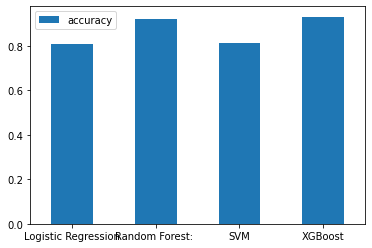

In [249]:
model_compare = pd.DataFrame({"Logistic Regression" : lr_score,
                             "Random Forest: ":rf_score,
                             "SVM":svm_score,
                             "XGBoost":xgb_score },index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation = 0);

As far as we can see RandomForest and XGBoost are extremely equal so we will try to tune these two to 
find the best parameter so we can acquire an ideal model

### Hyperparameter tuning with RandomnizedSearchCV

As we saw in the previous section that RandomForest ans XGBoost have the best accuracy 
so we will try to random search hyperparameter for these two and then grid search for the best one

In [250]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

xgb_grid = {'max_depth':range(3,10,2),
          'min_child_weight':range(1,6,2),
          'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(6,10)],
           'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

In [251]:
# Tune RandomForest
np.random.seed(42)

# Setup random hyperparameter search for RandomForest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

# Fit random hyperarameter search model for RandomForest
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [252]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [253]:
y_preds = rs_rf.predict(X_test)
accuracy_score(y_test,y_preds)

0.9077181208053692

In [254]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       927
           1       0.91      0.65      0.76       265

    accuracy                           0.91      1192
   macro avg       0.91      0.82      0.85      1192
weighted avg       0.91      0.91      0.90      1192



So as we can see the random result after I try few times have even worse result than the default

In [255]:
# Tune XGBoost
np.random.seed(42)

# Setup random hyperparameter search for RandomForest
rs_xg = RandomizedSearchCV(XGBClassifier(),
                          param_distributions = xgb_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

# Fit random hyperarameter search model for RandomForest
rs_xg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [256]:
rs_xg.best_params_

{'subsample': 0.8,
 'reg_alpha': 1e-05,
 'min_child_weight': 1,
 'max_depth': 5,
 'colsample_bytree': 0.8}

In [257]:
y_preds = rs_xg.predict(X_test)
accuracy_score(y_test,y_preds)

0.9328859060402684

In [258]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       927
           1       0.90      0.79      0.84       265

    accuracy                           0.93      1192
   macro avg       0.92      0.88      0.90      1192
weighted avg       0.93      0.93      0.93      1192



So as we can see the XGBoost after tuning with random search has achieved a better evaluation so i will try to grid search around this best search

### Hyperparameter tuning with GridSearchCV


In [259]:
xgb_grid = {'max_depth':range(5,10,2),
          'min_child_weight':range(1,6,2),
          'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(8,10)],
           'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

In [260]:
# Tune XGBoost
np.random.seed(42)

# Setup random hyperparameter search for RandomForest
gs_xg = GridSearchCV(XGBClassifier(),
                          param_grid = xgb_grid,
                          cv = 5,
                          verbose = True)

# Fit random hyperarameter search model for RandomForest
gs_xg.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [261]:
gs_xg.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 9,
 'min_child_weight': 1,
 'reg_alpha': 1e-05,
 'subsample': 0.6}

In [262]:
y_preds = gs_xg.predict(X_test)
accuracy_score(y_test,y_preds)

0.9362416107382551

In [264]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       927
           1       0.91      0.80      0.85       265

    accuracy                           0.94      1192
   macro avg       0.92      0.89      0.90      1192
weighted avg       0.94      0.94      0.93      1192



### Check for Overfitting

In [271]:
gs_xg.score(X_train,y_train)

1.0

As far as we know if the accuracy score on the train set is 100% => the model is overfitting

In [272]:
rs_xg.score(X_train,y_train)

0.9947567114093959

This is approximately 100% so is till be a litte bit overfitting, i will try to experiments further on this problem.
But i think the overfitting is the consequence of the imblanced data

In [318]:
rs_rf.score(X_train,y_train)

0.972734899328859

### Evaluation 
* ROC curve and AUC score
* Confusion matrix
* Classification report 
* Precision
* Recall
* F1-score

In [324]:
# Make predictions with tune model
y_preds = rs_rf.predict(X_test)

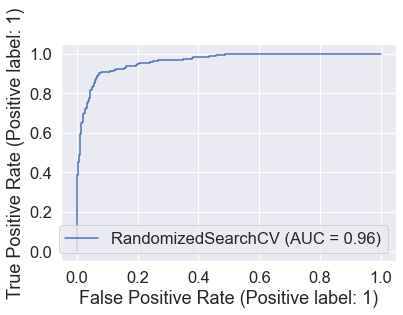

In [331]:
# Plot ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(rs_rf,X_test,y_test);

In [326]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[910  17]
 [ 93 172]]


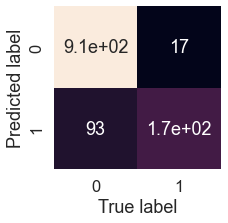

In [327]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom, top = ax.get_ylim()
    
plot_conf_mat(y_test,y_preds)

In [328]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       927
           1       0.91      0.65      0.76       265

    accuracy                           0.91      1192
   macro avg       0.91      0.82      0.85      1192
weighted avg       0.91      0.91      0.90      1192



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score so we'll using `cross_val_score()` 

In [329]:
# Check best hyperparameters 
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [332]:
# Create new clf with best parameters
clf = RandomForestClassifier(n_estimators = 510,
 min_samples_split = 14,
 min_samples_leaf = 1,
 max_depth = None)

In [333]:
# Cross-valiated accuray
cv_acc = cross_val_score(clf, X, y,cv = 5, scoring = "accuracy")
cv_acc 

array([0.20050336, 0.83053691, 0.87248322, 0.88506711, 0.85654362])

In [334]:
cv_acc = cv_acc.mean()
cv_acc

0.7290268456375839

As we can see from the cross validation score the data from the first fold performs really bad so this can result in a really bad prediction when predicts on the unseen data in the future

In [335]:
# Cross-valiated precision
cv_pre = cross_val_score(clf, X, y,cv = 5, scoring = "precision")
cv_pre

array([0.19983207, 0.60215054, 0.81395349, 0.825     , 0.74264706])

In [336]:
cv_pre = cv_pre.mean()
cv_pre

0.6367166317435041

In [337]:
# Cross-valiated recall
cv_recall = cross_val_score(clf, X, y,cv = 5, scoring = "recall")
cv_recall

array([1.        , 0.5       , 0.44117647, 0.54621849, 0.43881857])

In [338]:
cv_recall = cv_recall.mean()
cv_recall

0.5852427046768074

In [339]:
# Cross-valiated f1-score
cv_f1 = cross_val_score(clf, X, y,cv = 5, scoring = "f1")
cv_f1

array([0.33310007, 0.56264775, 0.58695652, 0.66165414, 0.53739612])

In [340]:
cv_f1 = cv_f1.mean()
cv_f1

0.5363509206154509

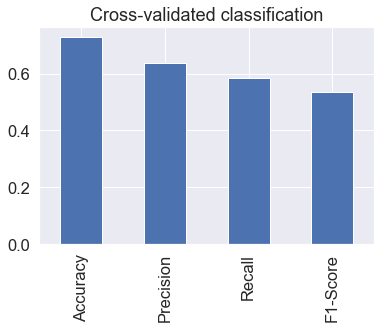

In [341]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_pre,
                           "Recall":cv_recall,
                           "F1-Score":cv_f1
                           },index=[0])
cv_metrics.T.plot.bar(title = "Cross-validated classification",legend = False);